# Efficient and Simple A/B Testing for Developers Via Bootstrapping and Approximate Bayesian Methods

In [1]:
### This is the only import necessary for the A/B test computations
import numpy as np 

### These packages are also imported for visualization in the notebook but are not necessary
import matplotlib.pyplot as plt   
import seaborn as sns 

### Overview:
In this notebook I present a number of bayesian methods for A/B testing and parameter estimation that allow developers to easily infer the differenece in conversion rate and expected value for multiple UI designs.

**Statistics:**

I'm going to assume that most developers are somewhat familar with basics statisitcs.  In statistics we take samples from population and use those samples to infer either the sampling distribution of parameters under the frequentist perspective or the posterior distribution of parameters under the bayesian perspective. (more on this later)

**Figure 1 - The Statistical Inference Process:** 

A diagram that shows how one moves from a sample from a population to making inference about population paramters or their sampling distributions. This diagram borrows many ideas from here: http://critical-numbers.group.shef.ac.uk/glossary/statistical_inference.html

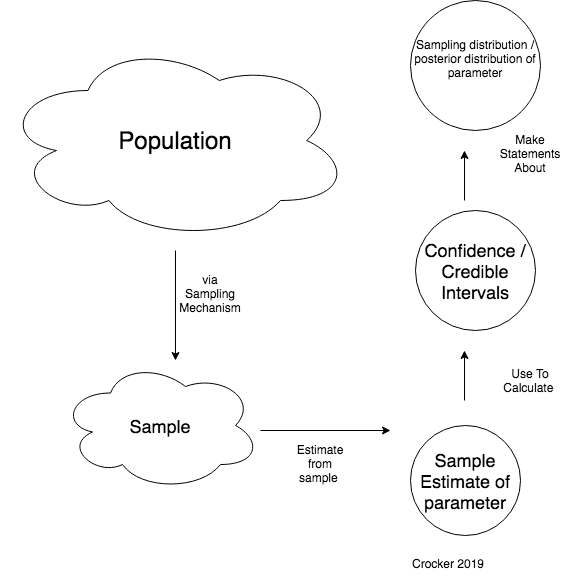

I also imagine that when you learned about statistics, you learned many rules about assumptions, null hypotheses tests, uncertainty intervals and probability distributions.  This is a lot to remember and with all these rules it's easy to make meaningful mistakes.  For example, a meaningful mistake I commonly see data scientists and researchers make is using tests that assume equal variance when the variance within groups is not equal.

Resampling, bootstrapping and efficient bayesian methods allows us to think less about these assumptions and move away from the flawed idea of null hypotheses tests.  These methods in practice allow us to look for practical signifigance, rather than statistical signifigance - and allow us to understand the 

### Defining the Problem:

**The Problem:**

* Testing two different UI designs for our app, UI design A and UI design B.  
* UI Design A is a new design that was randomly displayed to 30% of app users.
* UI Design B is the legacy design that will be displayed to the rest of the users. 
* Over our test period there were 1,000,000 users that ineracted with the app

**Business Questions:** 

* What is the difference in conversion ratio between the two different UI designs
* What is the differenece in expected value for design A vs design B


### Generating the data:

For this example I am going to use synthetic data to demonstrate a hypothetical problem. Generating random data is a very important skill for both developers and data scientists.  Random number generators allows ### expand on this more.

To generate sample data I use the np.random.binomial() function from numpy to generate two arrays of 0s and 1s for each UI design respectivley. The binomial distribution is a distribution that is commonly used to model proportions. This allows us to generate data with with a known proportion of conversions. Conversions are represented by 1s in the arrays returned by the np.random.binomial() function. 


In [23]:
# for demonstration purposes 
true_p_A = 0.05
true_p_B = 0.04

# 1,000,000 app users over test period
Total = 1000000
# 30% of users see new UI 
N_A = int(0.3 * Total)
# Remaining users see legacy design
N_B = int(0.7 * Total)

# generate some observations
observations_page_A = np.random.binomial(n = 1, p =  true_p_A, size = N_A)
observations_page_B = np.random.binomial(n = 1, p =  true_p_B, size = N_B)

### The Bootstrap

Despite being an extremely simple and intuitive technique for statistical inference, students rarely learn about the bootstrap in their introductory statistics class.

The mean proportion of conversions based on the bootstrap distribution of UI design A is 0.03971


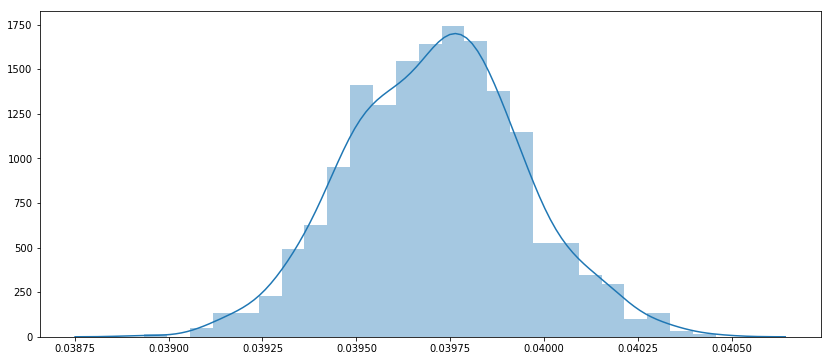

In [70]:
def bootstrap_mean(X, repititions):
    '''
    A fucntion to estimate the bootstrap distribution of an array of observations

    Parameters
    ----------
    X : array_like
    A list or array of values for which you wish to infer mean
    
    repititions : int
    An integer that represents the total nummber of bootstrap replications you wish to perform
    

    Returns
    -------
    means = list
    a list of all sample means calculated with the bootstrap reps
    '''
    # create a list to store our sample means 
    means = []
    # loop over the number of repititions
    for i in range(repititions):
        # sample with replacement from the data
        x = np.random.choice(X, len(X), replace=True)
        # calculate the statistic of interest 
        x = np.mean(x)
        # append the sample statistic to list of means
        means.append(x)
    return np.array(means)

# run our function 
means = bootstrap_mean(observations_page_B, 1000)  
    
# create a plot of the distribution of means
plt.figure(figsize = (14, 6))
_ = sns.distplot(means)
boot_mean = round(np.mean(means), 5)
print('The mean proportion of conversions based on the bootstrap distribution of UI design A is {}'.format(boot_mean))




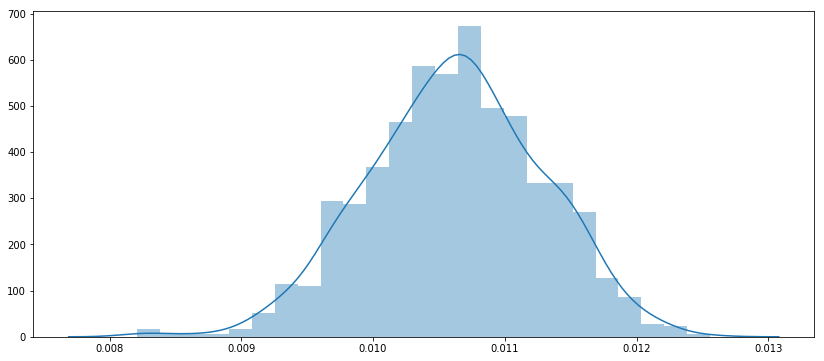

In [72]:
def bootstrap_diff_mean(X,Y, repititions):
    '''
    A fucntion to estimate the bootstrap distribution of an array of observations

    Parameters
    ----------
    X : array_like
    A list or array of values for one group of observations
    
    y : array_like
    A list or array of values for one group of observations
    
    repititions : int
    An integer that represents the total nummber of bootstrap replications you wish to perform
    

    Returns
    -------
    means = list
    a list of sample mean differences calculated with the bootstrap reps
    '''
    means = []
    for i in range(repititions):
        x = np.random.choice(X, len(X))
        x = bootstrap_mean(x, 1)
        y = np.random.choice(Y, len(Y))
        y = bootstrap_mean(y, 1)
        diff = x-y
        means.append(diff)
    return np.array(means)

means = bootstrap_diff_mean(observations_page_A, observations_page_B, 1000)
plt.figure(figsize = (14, 6))
_ = sns.distplot(means)